In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
from functools import reduce

In [2]:
# read from the dataset
with open("generated.json") as f:
    data = json.load(f)

# 1) from a rows to list of tuples with userId, cntTrack
processingData = map(
    lambda x: [(x["userId"],v) for k,v in x.items() if k.startswith("track")],
    data
)

# 2) flat list
processingData = reduce(list.__add__, processingData)

# 3) aggregation
def counter(acc, value):
    userId, trackListened = value
    if userId not in acc:
        acc[userId] = (0,0)
    summing,counting = acc[userId]
    acc[userId] = (summing + trackListened, counting + 1) 
    return acc

processingData = reduce(counter, processingData, {})

# 4) calculate avg

def calculateAvg(x):
    userId, v = x
    return userId, v[0]/v[1]

processingData = map(
    calculateAvg,
    processingData.items()
)

data = list(processingData)

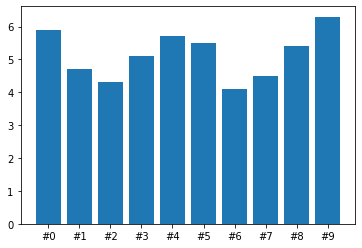

In [3]:
# split for visualization
users, avg = zip(*data)
users = ["#{}".format(e) for e in users]
plt.bar(users, avg, align="center")
plt.show()